In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.decomposition import PCA

In [42]:
!pip install pandas_ml

     |████████████████████████████████| 102kB 2.7MB/s 


In [2]:
from google.colab import files
uploaded=files.upload()

Saving sources.csv to sources (1).csv


In [0]:
import io
su=pd.read_csv(io.BytesIO(uploaded['sources.csv']))

In [4]:
su.head(5)

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,LONGITUDE,MAXIMUM_HEIGHT,MAGNITUDE_ABE,MAGNITUDE_IIDA,INTENSITY_SOLOVIEV,WARNING_STATUS,MISSING,MISSING_ESTIMATE,INJURIES,INJURY_ESTIMATE,FATALITIES,FATALITY_ESTIMATE,DAMAGE_MILLIONS_DOLLARS,DAMAGE_ESTIMATE,HOUSES_DAMAGED,HOUSE_DAMAGE_ESTIMATE,HOUSES_DESTROYED,HOUSE_DESTRUCTION_ESTIMATE,ALL_MISSING,MISSING_TOTAL,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,SYRIA,NaN,SYRIAN COASTS,35.683,35.80,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,50.0,GREECE,NaN,THERA ISLAND (SANTORINI),36.400,25.40,90.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,SYRIA,NaN,SYRIAN COASTS,35.683,35.80,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,50.0,TURKEY,NaN,"IONIAN COASTS, TROAD",39.960,26.24,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,50.0,ISRAEL,NaN,ISRAEL AND LEBANON COASTS,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dl=['COUNTRY','STATE/PROVINCE','LOCATION','LATITUDE','LONGITUDE']
su=su.drop(dl,axis=1)

In [0]:
su.fillna(0,inplace=True)

In [7]:
su.astype(int).dtypes

SOURCE_ID                     int64
YEAR                          int64
MONTH                         int64
DAY                           int64
HOUR                          int64
MINUTE                        int64
CAUSE                         int64
VALIDITY                      int64
FOCAL_DEPTH                   int64
PRIMARY_MAGNITUDE             int64
REGION_CODE                   int64
MAXIMUM_HEIGHT                int64
MAGNITUDE_ABE                 int64
MAGNITUDE_IIDA                int64
INTENSITY_SOLOVIEV            int64
WARNING_STATUS                int64
MISSING                       int64
MISSING_ESTIMATE              int64
INJURIES                      int64
INJURY_ESTIMATE               int64
FATALITIES                    int64
FATALITY_ESTIMATE             int64
DAMAGE_MILLIONS_DOLLARS       int64
DAMAGE_ESTIMATE               int64
HOUSES_DAMAGED                int64
HOUSE_DAMAGE_ESTIMATE         int64
HOUSES_DESTROYED              int64
HOUSE_DESTRUCTION_ESTIMATE  

In [8]:
su.head(5)

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,MAXIMUM_HEIGHT,MAGNITUDE_ABE,MAGNITUDE_IIDA,INTENSITY_SOLOVIEV,WARNING_STATUS,MISSING,MISSING_ESTIMATE,INJURIES,INJURY_ESTIMATE,FATALITIES,FATALITY_ESTIMATE,DAMAGE_MILLIONS_DOLLARS,DAMAGE_ESTIMATE,HOUSES_DAMAGED,HOUSE_DAMAGE_ESTIMATE,HOUSES_DESTROYED,HOUSE_DESTRUCTION_ESTIMATE,ALL_MISSING,MISSING_TOTAL,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
1,3,-1610,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,50.0,90.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0
2,4,-1365,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,5,-1300,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,50.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,-760,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,50.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
su['VALIDITY']=su['VALIDITY'].replace(['1'],0)
su['VALIDITY']=su['VALIDITY'].replace(['2'],0)
su['VALIDITY']=su['VALIDITY'].replace(['3'],1)
su['VALIDITY']=su['VALIDITY'].replace(['4'],2)

In [0]:
from sklearn.model_selection import train_test_split
X=su.iloc[:,:-1]
y=su['VALIDITY']
scale=StandardScaler()
Xn=scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.33, random_state=42)

In [11]:
from sklearn import  linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
print("Accuracy",lr.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy 0.7866354044548651


In [0]:
y_predicted = np.array(lr.predict(X_test))
y_prob1=lr.predict_proba(X_test)[:,1]
y_prob2=lr.predict_proba(X_test)[:,2]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Confusion matrix:
Predicted  -1.0  0.0  1.0  2.0  3.0  4.0  __all__
Actual                                           
-1.0         61    2    1    0    0    0       64
0.0           4    9   25    1    0    0       39
1.0           0    9  131   21    0    0      161
2.0           0    1   36  141    0    0      178
3.0           0    0    0   66   41   16      123
4.0           0    0    0    0    0  288      288
__all__      65   21  193  229   41  304      853


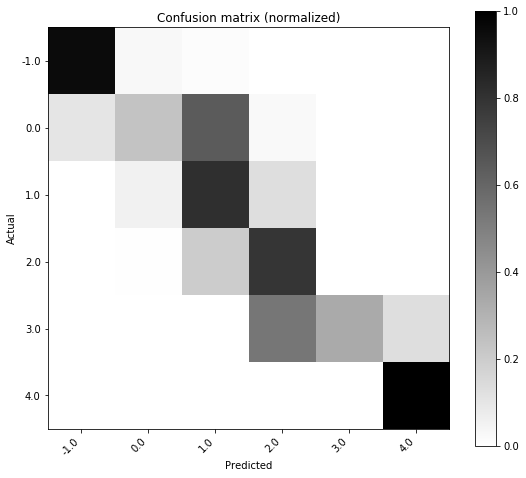

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted  -1.0  0.0  1.0  2.0  3.0  4.0  __all__
Actual                                           
-1.0         61    2    1    0    0    0       64
0.0           4    9   25    1    0    0       39
1.0           0    9  131   21    0    0      161
2.0           0    1   36  141    0    0      178
3.0           0    0    0   66   41   16      123
4.0           0    0    0    0    0  288      288
__all__      65   21  193  229   41  304      853


Overall Statistics:

Accuracy: 0.7866354044548651
95% CI: (0.7575889658314204, 0.8136857126034515)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.3797059977124766e-145
Kappa: 0.7218810462199928
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                      -1.0  ...        4.0
Population                                    853  ...        853
P: Condition positive                          64  ...        288
N: Condition negative                         789  ...        565
Test outcome positi

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


In [13]:
y_predicted = np.array(lr.predict(X_test))
y_right = np.array(y_test)
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
ans=mean_absolute_error(y_test,y_predicted)
ans1=mean_squared_error(y_test,y_predicted)
print("Mean Absolute Error Is:",ans)
print("Mean Squared Error Is:",ans1)

Mean Absolute Error Is: 0.21688159437280188
Mean Squared Error Is: 0.223915592028136


In [21]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

        -1.0       0.94      0.95      0.95        64
         0.0       0.43      0.23      0.30        39
         1.0       0.68      0.81      0.74       161
         2.0       0.62      0.79      0.69       178
         3.0       1.00      0.33      0.50       123
         4.0       0.95      1.00      0.97       288

    accuracy                           0.79       853
   macro avg       0.77      0.69      0.69       853
weighted avg       0.81      0.79      0.77       853

